## Лабораторная работа №3 «Цифровой спектральный анализ детерминированных сигналов»
Данная лабораторная работа посвящена основам цифрового спектрального анализа. Ей
предшествует лабораторная работа №2 ДВПФ и ДПФ и лабораторная работа №1 дискретизация
аналоговых сигналов. Работа нацелена на изучение эффектов, возникающих при спектральном
анализе.
Под детерминированностью сигнала в данном случае подразумевается то, что спектральный
анализ производится для конкретной реализации, которая полностью определена.

## Задание на моделирование

In [112]:
from math import copysign
import numpy as np 
import scipy as scp
import matplotlib.pyplot as plt

### Задача 1.1. Частотная ось ДПФ

Считайте отсчеты дискретного сигналаx[k], содержащегося в аудиофайле Вашего варианта.
1) Выберите y[k] — часть информативной области сигнала x[k]
длиной $2^{14}$ отсчетов. Если в файле меньше $2^{14}$ отсчетов, дополните ее нулями до этого числа отчетов справа.
2) Постройте с помощью алгоритма БПФ один период ДВПФ сигнала y[k]. Укажите расстояние между точками по оси частот. Ось частот приведите в Гц. Определите по графику частоты основных гармонических компонент.
3) Выведите график сигнала y[k] в области, где наблюдается колебание. По графику оцените период этого колебания $T_{0}$. Сравните частоту $f_{0}=\frac{1}{T_{0}}$ с частотами основных гармоник из п.2

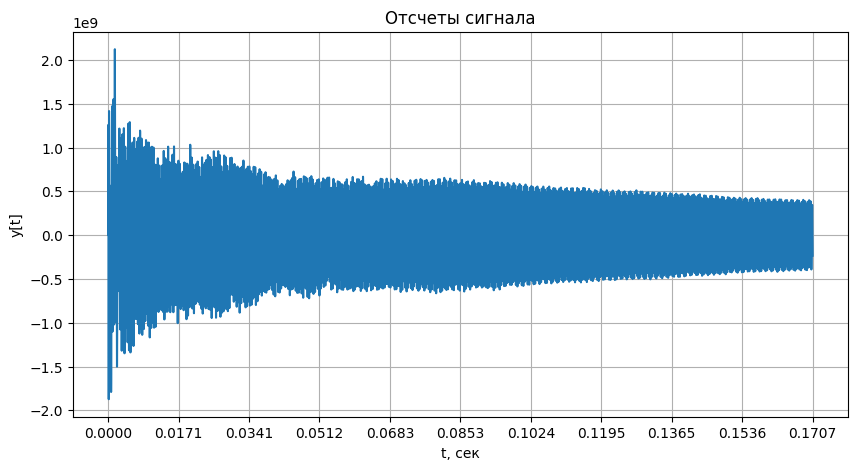

In [93]:
# 1

samplerate, x_k = scp.io.wavfile.read("data/glockenspiel.wav")

n = 2**14
y_k = np.array(x_k[:2**14])

duration = n / samplerate
t_k = np.linspace(0, duration, n)

plt.figure(figsize=[10,5])
plt.xticks(np.arange(0, duration + 1/samplerate, duration/10))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(t_k, y_k)

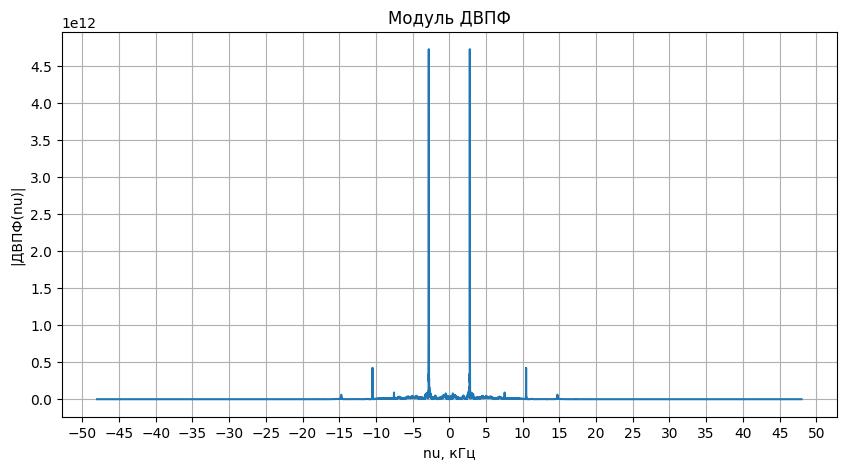

In [94]:
# 2

dtft_y_k = np.fft.fftshift(np.fft.fft(y_k, n))
nu = (np.arange(n) / (n) - 0.5) * samplerate / 1000

plt.figure(figsize=[10,5])
plt.xticks(np.arange(-50, +55, 5))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

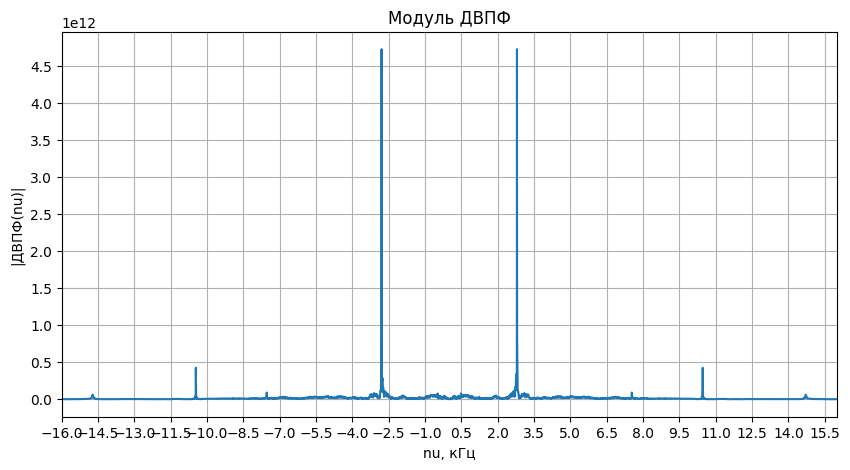

In [95]:
# Более читабельный график

plt.figure(figsize=[10,5])
plt.xlim(-16, 16)
plt.xticks(np.arange(-16, +16, 1.5))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

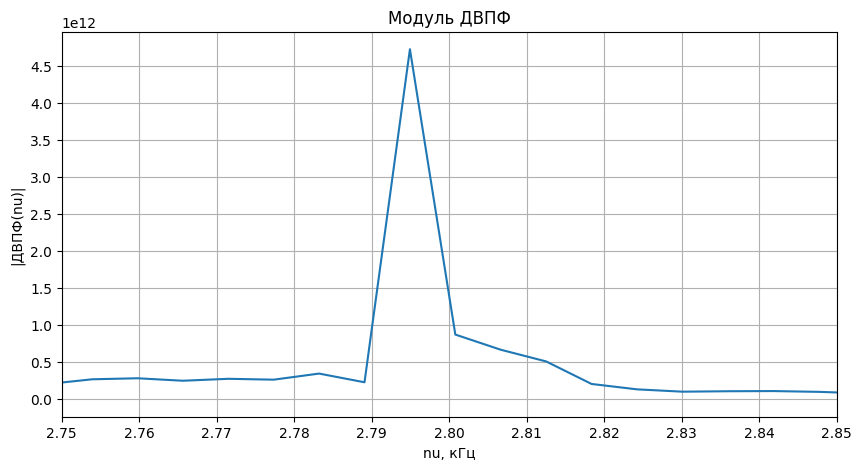

In [96]:
# Области ДФПВ вблизи основных гармоник

# f1 = 2.795 kHz

plt.figure(figsize=[10,5])
plt.xlim(+2.75, +2.85)
plt.xticks(np.arange(+2.75, +2.85, 0.01))
plt.yticks(np.arange(0, 5 * 1e12, 0.5 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

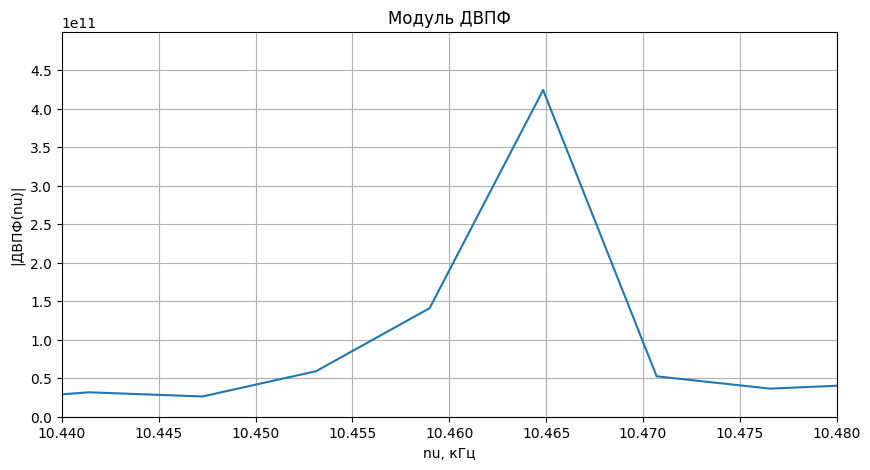

In [97]:
# f2 = 10.465 kHz

plt.figure(figsize=[10,5])
plt.xlim(+10.44, +10.48)
plt.xticks(np.arange(+10.44, +10.48, 0.005))
plt.ylim(0, 0.5 * 1e12)
plt.yticks(np.arange(0, 0.5 * 1e12, 0.05 * 1e12))

plt.grid()
plt.title('Модуль ДВПФ')
plt.xlabel('nu, кГц')
plt.ylabel('|ДВПФ(nu)|')

plt.plot(nu, np.abs(dtft_y_k))

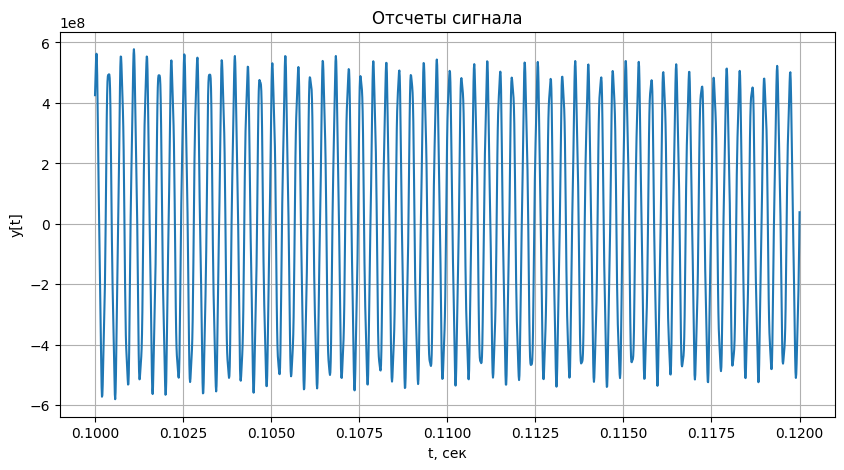

In [117]:
# 3 

t1 = 0.10
t2 = 0.12

k1 = int(t1 * samplerate)
k2 = int(t2 * samplerate)

sub_duration = (k2-k1) / samplerate
sub_y_k = y_k[k1:k2]
sub_t_k = np.linspace(t1, t2, k2-k1)

plt.figure(figsize=[10,5])
# plt.xticks(np.arange(0, sub_duration + 1/samplerate, sub_duration/10))

plt.grid()
plt.title('Отсчеты сигнала')
plt.xlabel('t, сек')
plt.ylabel('y[t]')

plt.plot(sub_t_k, sub_y_k)

In [123]:
zeros_ct = 0.;
for idx in range(len(sub_y_k) - 1):
    if copysign(1, sub_y_k[idx]) * copysign(1, sub_y_k[idx+1]) < 0: 
        zeros_ct += 1

periods_num = zeros_ct / 2
freq = periods_num / sub_duration
print(freq)

2800.0
